# Deconvolution of 10x Visium single cell data

## 1. Load libraries and h5ad file

In [ ]:
# If needed for installation of tangram (MacOS) uncomment and run or run in terminal without !
# !pip install torch torchvision torchaudio
# !pip install tangram-sc

In [12]:
import scanpy as sc
import squidpy as sq
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tangram as tg

%matplotlib inline

In [13]:
# Check the path you are working from
!pwd

/Users/thorsten/code/ThorstenCodes/Bioinformatics_TK/Projects/Spatial Transcriptomics/Project_1/dataset2_python


In [14]:
# Change the path for easier navigation through the project
%cd '/Users/thorsten/code/ThorstenCodes/Bioinformatics_TK/Projects/Spatial Transcriptomics/Project_1/dataset2_python/'

/Users/thorsten/code/ThorstenCodes/Bioinformatics_TK/Projects/Spatial Transcriptomics/Project_1/dataset2_python


In [17]:
# load preprocessed spatial data
adata_st = sc.read_h5ad('./results/preprocessed.h5ad')

In [35]:
# load reference dataset for colon (for cluster annnotation with tangram)
adata_sc = sc.read_h5ad('./data/Reference_scRNA_Colon/colon_reference.h5ad')

## 2.1  Unsupervised Deconvolution using Tangram

In [46]:
adata_st.obs.head(5)

,in_tissue,array_row,array_col,spot,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,n_counts,n_genes,Clusters
AAACCGGGTAGGTACC-1,1,42,28,a,5096,8.536407,21597.0,9.980356,22.174376,31.499745,41.209427,55.169699,601.0,6.400258,2.782794,21597.0,5096,1
AAACCGTTCGTCCAGG-1,1,52,42,a,4795,8.475538,19144.0,9.859797,21.165901,31.372754,41.506477,55.343711,633.0,6.452049,3.306519,19144.0,4795,4
AAACCTCATGAAGTTG-1,1,37,19,a,3387,8.127995,11459.0,9.346618,29.112488,38.415219,47.962300,61.855310,613.0,6.419995,5.349507,11459.0,3387,0
AAACGAGACGGTTGAT-1,1,35,79,a,3714,8.220134,10961.0,9.302190,20.655050,29.176170,39.211751,55.104461,456.0,6.124683,4.160204,10961.0,3714,3
AAACTGCTGGCTCCAA-1,1,45,67,a,4360,8.380457,15037.0,9.618336,22.052271,30.784066,40.406996,54.625258,350.0,5.860786,2.327592,15037.0,4360,4


In [48]:
adata_sc.obsm.keys()

KeysView(AxisArrays with keys: Epithelial_programs, X_umap, X_umap_Epithelial, X_umap_Immune, X_umap_Myeloid, X_umap_Stromal, X_umap_TNK)

In [55]:
adata_sc.obsm['X_umap'].shape


(48117, 2)

In [61]:
adata_sc.obs['labels'] = adata_sc.obs['labels'].astype(str)

In [69]:
print(type(adata_sc.obsm['X_umap']))
adata_sc.obsm['X_umap'] = np.array(adata_sc.obsm['X_umap'], dtype=float)
print(type(adata_sc.obsm['X_umap']))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


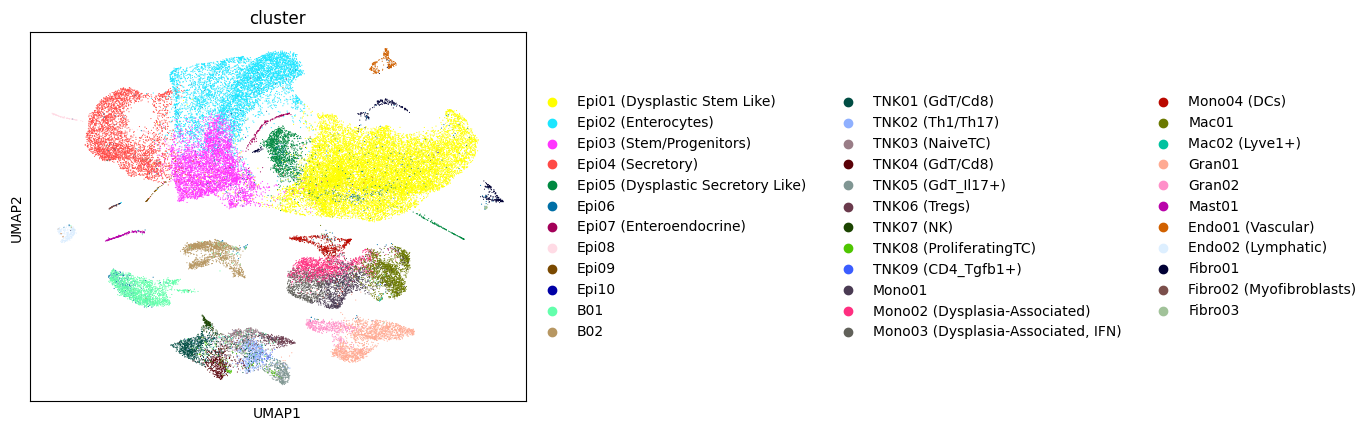

In [71]:
sc.pl.umap(adata_sc, color='cluster')

In [44]:
adata_sc.obs

,Chemistry,DOB,Date,Flowcell,Gender,Hashed,Index,Lane,Model,SampleID,State,cluster,labels,compartment,tdTomato,cluster_short,coarseState
AKPTV5_V2_AAAGATGCACGGACAA,SC3Pv2,2019-08-26,2020-02-20,H55F7CCX2,M,True,SI-GA-A12,2,AKPTV,AKPTV5_V2,malignant (9weeks),Epi01 (Dysplastic Stem Like),Epi,epithelial,0.0,Epi01,malignant
AKPTV5_V2_AACCGCGTCGAGCCCA,SC3Pv2,2019-08-26,2020-02-20,H55F7CCX2,M,True,SI-GA-A12,2,AKPTV,AKPTV5_V2,malignant (9weeks),Epi01 (Dysplastic Stem Like),Epi,epithelial,1.0,Epi01,malignant
AKPTV5_V2_AAGGCAGTCACATAGC,SC3Pv2,2019-08-26,2020-02-20,H55F7CCX2,M,True,SI-GA-A12,2,AKPTV,AKPTV5_V2,malignant (9weeks),Epi01 (Dysplastic Stem Like),Epi,epithelial,0.0,Epi01,malignant
AKPTV5_V2_ACTGAGTTCAAAGACA,SC3Pv2,2019-08-26,2020-02-20,H55F7CCX2,M,True,SI-GA-A12,2,AKPTV,AKPTV5_V2,malignant (9weeks),Epi01 (Dysplastic Stem Like),Epi,epithelial,0.0,Epi01,malignant
AKPTV5_V2_AGGCCACAGCTCTCGG,SC3Pv2,2019-08-26,2020-02-20,H55F7CCX2,M,True,SI-GA-A12,2,AKPTV,AKPTV5_V2,malignant (9weeks),Epi01 (Dysplastic Stem Like),Epi,epithelial,2.0,Epi01,malignant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cont3_V2_TTGGAACCATGATCCA,SC3Pv2,2018-03-06,2018-07-03,HKJ73CCXY,F,False,SI-GA-G11,4,WT (+ injection),cont3_V2,normal,Endo02 (Lymphatic),Endo,stromal,NaN,Endo02,normal
cont3_V2_TTTATGCGTTCCATGA,SC3Pv2,2018-03-06,2018-07-03,HKJ73CCXY,F,False,SI-GA-G11,4,WT (+ injection),cont3_V2,normal,Endo01 (Vascular),Endo,stromal,NaN,Endo01,normal
cont3_V2_TTTATGCTCAGTCAGT,SC3Pv2,2018-03-06,2018-07-03,HKJ73CCXY,F,False,SI-GA-G11,4,WT (+ injection),cont3_V2,normal,Fibro02 (Myofibroblasts),Fibro,stromal,NaN,Fibro02,normal
cont3_V2_TTTGTCACAGCATGAG,SC3Pv2,2018-03-06,2018-07-03,HKJ73CCXY,F,False,SI-GA-G11,4,WT (+ injection),cont3_V2,normal,Fibro01,Fibro,stromal,NaN,Fibro01,normal


In [34]:
adata_sc.var

,name
ENSG00000225880,ENSG00000225880
ENSG00000187634,ENSG00000187634
ENSG00000188976,ENSG00000188976
ENSG00000187961,ENSG00000187961
ENSG00000187583,ENSG00000187583
...,...
ENSG00000130307,ENSG00000130307
ENSG00000269190,ENSG00000269190
ENSG00000283632,ENSG00000283632
ENSG00000104888,ENSG00000104888


In [31]:
sc.pl.umap(adata_sc, color="cell_subclass", size=10, frameon=False, show=False)

KeyError: "Could not find 'umap' or 'X_umap' in .obsm"

In [11]:
# Let's shortly plot our image again
adata_st.uns.pop('Clusters_colors')
sq.pl.spatial_scatter(adata_st, color="Clusters")


NameError: name 'adata_st' is not defined

In [22]:
markers = sc.get.rank_genes_groups_df(adata, adata.obs['Clusters'].unique())
markers = markers[['group','names']]
markers = list(np.unique(markers['names'].values))

In [27]:
len(markers)

13081